In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import us_state_abbrev as abb

In [2]:
# Read in
urlNYT = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/'
urlAtl = 'https://covidtracking.com/api/v1/states/'
byState = pd.read_csv(urlNYT+'us-states.csv', index_col='state', parse_dates=['date'])
byCnty = pd.read_csv(urlNYT+'us-counties.csv', index_col='state', parse_dates=['date'])
fullData = pd.read_csv(urlAtl+'daily.csv', index_col='state', parse_dates=['date'])

In [87]:
s = 'Florida'
c = 'Miami-Dade'

In [88]:
state = byState.loc[s]
county = byCnty.loc[s]
county = county.reset_index().set_index('county')
county = county.loc[c]
historic = fullData.loc[abb.us_state_abbrev[s]]

In [89]:
# Add new cases
state = state.reset_index().set_index('date')
county = county.reset_index().set_index('date')
historic = historic.reset_index().set_index('date')
state['newCases'] = state.cases.diff()
for cnty, data in county.groupby('county'):
    county.loc[county['county']==cnty, 'newCases'] = data.cases.transform('diff')

In [90]:
normalized = state.newCases/historic.totalTestResultsIncrease

In [91]:
normalized.replace([np.inf, -np.inf], np.nan, inplace=True)

In [92]:
normalized.dropna().index[0]

Timestamp('2020-03-05 00:00:00')

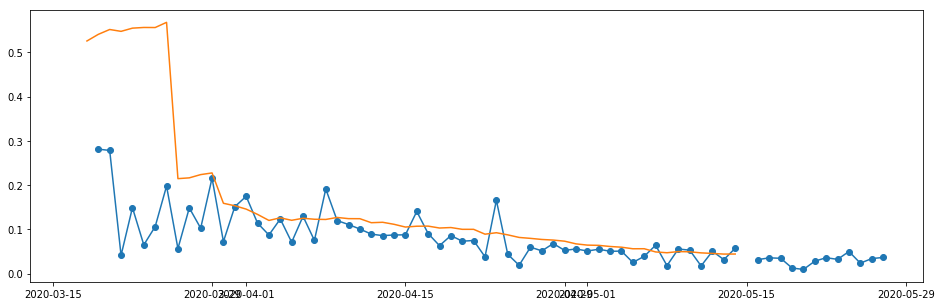

In [93]:
fig, ax = plt.subplots(1,1, figsize=(16,5))
ax.plot(normalized.loc[normalized.dropna().index[0]+pd.Timedelta(days=14):], '-o')
ax.plot(normalized.rolling(14).mean())
#ax.set_ylim(0, 0.5)
ax.set_xlim(pd.to_datetime('2020-03-13'), None)
plt.show()

In [77]:
historic.totalTestResultsIncrease

date
2020-05-27        0.0
2020-05-26     3636.0
2020-05-25     7590.0
2020-05-24     5769.0
2020-05-23     6039.0
2020-05-22     5881.0
2020-05-21     5729.0
2020-05-20     5198.0
2020-05-19     7841.0
2020-05-18     7072.0
2020-05-17     5852.0
2020-05-16     8847.0
2020-05-15     6346.0
2020-05-14     6619.0
2020-05-13     4519.0
2020-05-12     5916.0
2020-05-11     2316.0
2020-05-10     6623.0
2020-05-09     3028.0
2020-05-08     4367.0
2020-05-07     4727.0
2020-05-06     2804.0
2020-05-05     6150.0
2020-05-04        0.0
2020-05-03     2236.0
2020-05-02        0.0
2020-05-01     3124.0
2020-04-30     2315.0
2020-04-29     2073.0
2020-04-28    12934.0
               ...   
2020-04-05     1241.0
2020-04-04     2014.0
2020-04-03     1715.0
2020-04-02     1700.0
2020-04-01      443.0
2020-03-31     1557.0
2020-03-30     2700.0
2020-03-29     3500.0
2020-03-28        0.0
2020-03-27     1763.0
2020-03-26      739.0
2020-03-25      598.0
2020-03-24      800.0
2020-03-23     1400.0
2020-

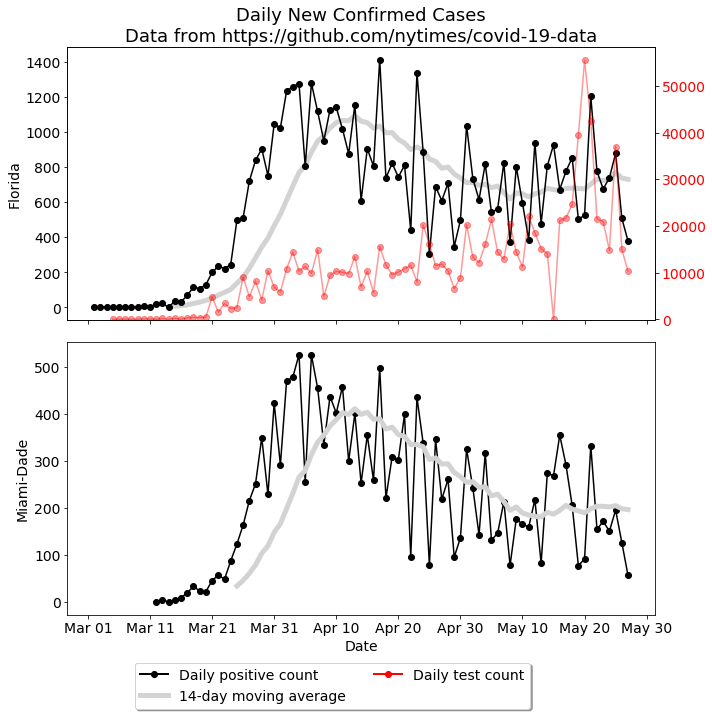

In [10]:
# Make plot
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax1.plot(state['newCases'], '-o', label='Daily positive count', color='black', zorder=1)
ax1.plot(state['newCases'].rolling(14).mean(), label='14-day moving average', color='lightgrey', linewidth=5, zorder=0)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_ylabel(s, fontsize=14)
ax1.set_title('Daily New Confirmed Cases\nData from https://github.com/nytimes/covid-19-data', fontsize=18)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2 = ax1.twinx()
ax2.plot(historic['totalTestResultsIncrease'], '-o', label='Daily test count', color='red', zorder=0, alpha=0.4)
ax2.tick_params(axis='y', labelsize=14, labelcolor='red')
ax2.set_ylim(-100, None)

ax3.plot(county['newCases'], '-o', label='Daily count', color='black')
ax3.plot(county['newCases'].rolling(14).mean(), label='14-day moving average', color='lightgrey', linewidth=5)
ax3.set_xlabel('Date', fontsize=14)
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)
ax3.set_ylabel(c, fontsize=14)
ax3.legend(loc='best', fontsize=14)
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

custom_lines = [plt.Line2D([0],[0], linestyle='solid', lw=2,
                           color='black', marker='o'),
                plt.Line2D([0],[0], linestyle='solid', lw=5,
                           color='lightgrey'),
                plt.Line2D([0],[0], linestyle='solid', lw=2,
                           color='red', marker='o')]
ax3.legend(custom_lines, ['Daily positive count', '14-day moving average', 'Daily test count'],
           ncol=2, fontsize=14, bbox_to_anchor=(0.8, -0.15),
           edgecolor='lightgrey', fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

In [22]:
from us_state_abbrev import us_state_abbrev as abbr

In [23]:
regions = [('Florida', 'Miami-Dade'),
           ('Delaware', 'Sussex'),
           ('Connecticut', 'Litchfield'),
           ('Massachusetts', 'Plymouth'),
           ('Michigan', 'Midland')]

In [26]:
for s, c in regions:
    print('{} County in {} ({})'.format(c, s, abbr[s]))

Miami-Dade County in Florida (FL)
Sussex County in Delaware (DE)
Litchfield County in Connecticut (CT)
Plymouth County in Massachusetts (MA)
Midland County in Michigan (MI)
